In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "last"


In [2]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from requests import get

In [3]:
url = 'https://pandaforecast.com/stock_forecasts/forecast_amzn/for2024/'


In [4]:
soup = BeautifulSoup(requests.get(url).text, 'lxml')
stock_data = soup.find_all("table")
# len(stock_data)
table = stock_data[0]
thead = table.find_all('thead')[0]


In [5]:
d = {}
for header in thead.find_all('th'):
    pass
    column_name = header.text.replace('.','')\
                              .replace('%','')\
                              .replace(',','')\
                              .strip()
    d[column_name] = []
#     d

tbody = table.find_all('tbody')[0]

for row in tbody.find_all('tr'):
    pass
    cells = [ td for td in row.find_all('td')]
    cells = [ td.text for td in cells ]
    for td, column_name in zip(cells, d):
        pass
        d[column_name].append(td.replace(' ','')\
                                 .replace('%', '')
                             )
df = pd.DataFrame(d).set_index('Month')
df.drop(columns = ['Vol'], inplace=True)
df
        

,Target,Pes,Opt
Month,,,
Jan,4001.58,3701.46,4289.70
Feb,4379.73,4222.06,4563.68
Mar,4530.83,4225.00,4768.70
Apr,4265.78,3760.28,4553.72
May,4061.02,3707.71,4420.42
Jun,4341.23,3963.54,4647.29
Jul,3787.72,3605.91,4088.85
Aug,3884.31,3528.90,4012.49
Sep,3389.06,3261.97,3511.07


In [6]:
for column in df.columns:
    pass
    # Convert DataFrame column from string to float
    df[column] = pd.to_numeric(df[column], downcast="float")
df.dtypes
df.head()

,Target,Pes,Opt
Month,,,
Jan,4001.580078,3701.459961,4289.700195
Feb,4379.729980,4222.060059,4563.680176
Mar,4530.830078,4225.000000,4768.700195
Apr,4265.779785,3760.280029,4553.720215
May,4061.020020,3707.709961,4420.419922


# Plotly
---
<i> plotly for interactive charts, doesn't show on github  </i>

In [7]:
import plotly.express as px
for col in df.columns:
    pass
    fig = px.line(df, x=df.index, y=df[col], title='2024 Amazon '+ col)
#     fig.show()
    


# Matplotlib
---

In [62]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
# plt.style.use('seaborn-pastel')



In [9]:
dates = df.index

Index(['Target', 'Pes', 'Opt'], dtype='object')


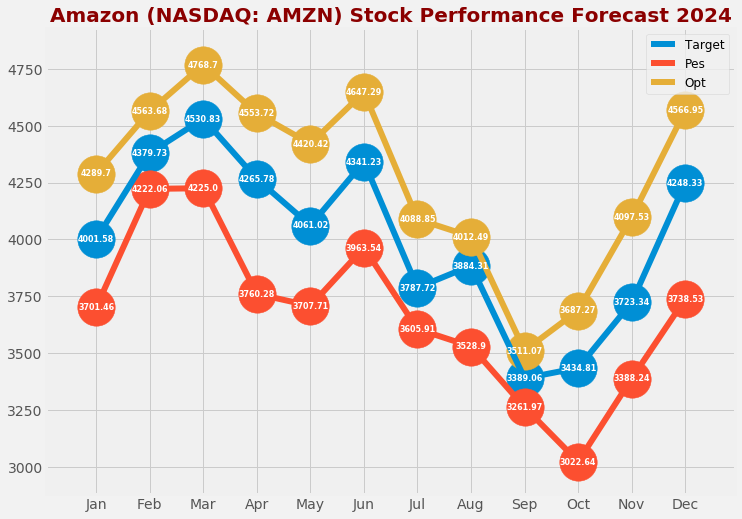

In [142]:
plt.figure(figsize=(11, 8), facecolor='0.95', )

for col in df.columns:
    pass
    values = df[col]
    plt.scatter(dates,values, s=1400)
    plt.plot(dates, values, linewidth=6)
    plt.legend(df.columns, fontsize=12,)
    
plt.grid(visible=True)
plt.grid(visible=True)
print(df.columns)
cols = df.columns
for i, month in enumerate(df.reset_index()['Month']):
    pass
    for col in cols:
        pass
        plt.text(i,df[col][i],df[col][i], 
            verticalalignment='center', horizontalalignment='center',size='small',
             color='w',weight='semibold', fontsize=8)
    
plt.title('Amazon (NASDAQ: AMZN) Stock Performance Forecast 2024', fontsize=20, 
          color='darkred', weight='semibold')
plt.show()


In [11]:
import seaborn as sns


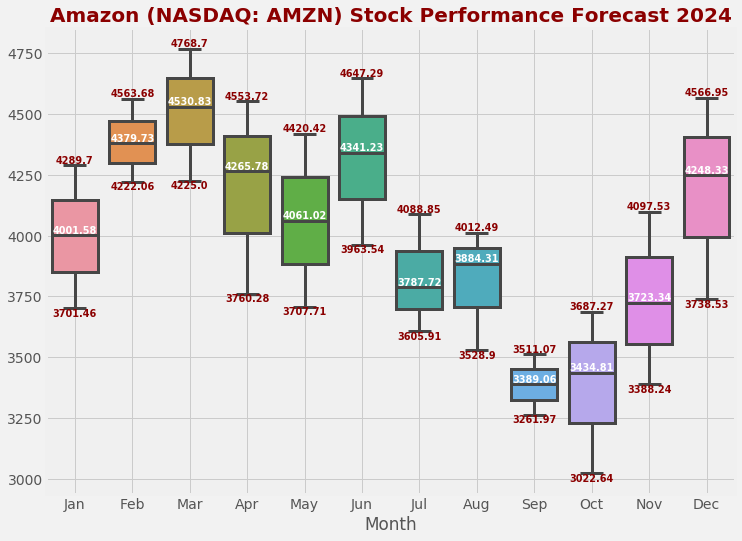

In [148]:
plt.figure(figsize=(11, 8), facecolor='0.95', )
plt.title('Amazon (NASDAQ: AMZN) Stock Performance Forecast 2024', fontsize=20, 
          color='darkred', weight='bold')
box_plot = sns.boxplot(data=df.transpose(), orient="",linewidth=3.0 )

plt.grid(visible=True)

for xtick,i in enumerate(box_plot.get_xticks()):
    pass
    box_plot.text(i,df['Target'][i],df['Target'][i], 
            verticalalignment='bottom',horizontalalignment='center',size='x-small',
                      color='w',weight='bold')
    box_plot.text(i,df['Opt'][i],df['Opt'][i], 
            verticalalignment='bottom',horizontalalignment='center',size='x-small',
                      color='darkred',weight='semibold')
    box_plot.text(i,df['Pes'][i],df['Pes'][i], 
            verticalalignment='top',horizontalalignment='center',size='x-small',
                      color='darkred',weight='semibold')


In [130]:
df.transpose()

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Target,4001.580078,4379.729980,4530.830078,4265.779785,4061.020020,4341.229980,3787.719971,3884.310059,3389.060059,3434.810059,3723.340088,4248.330078
Pes,3701.459961,4222.060059,4225.000000,3760.280029,3707.709961,3963.540039,3605.909912,3528.899902,3261.969971,3022.639893,3388.239990,3738.530029
Opt,4289.700195,4563.680176,4768.700195,4553.720215,4420.419922,4647.290039,4088.850098,4012.489990,3511.070068,3687.270020,4097.529785,4566.950195
